In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy import stats

In [2]:
# Carregando o data frame
df = pd.read_excel('../data/registros-prod.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


### Missing values

In [4]:
# Checando missing values
df.isna().sum()

QTD_CHOC       0
VAR_1          0
VAR_2          0
PESO_BOMBOM    0
dtype: int64

### Outliers e distribuicao dos dados

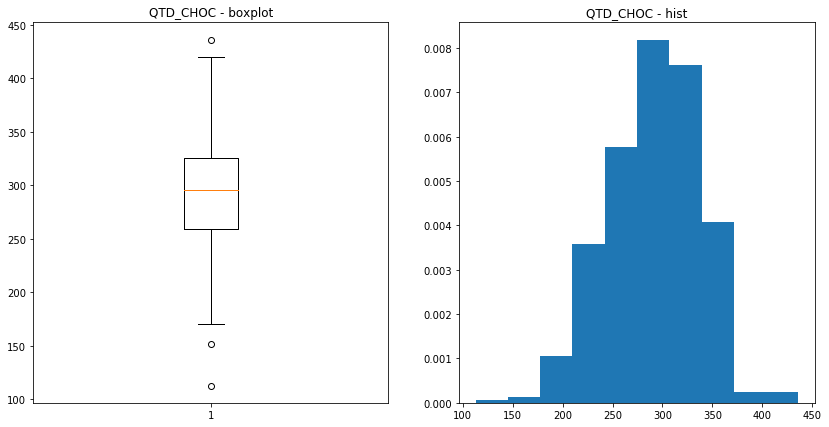

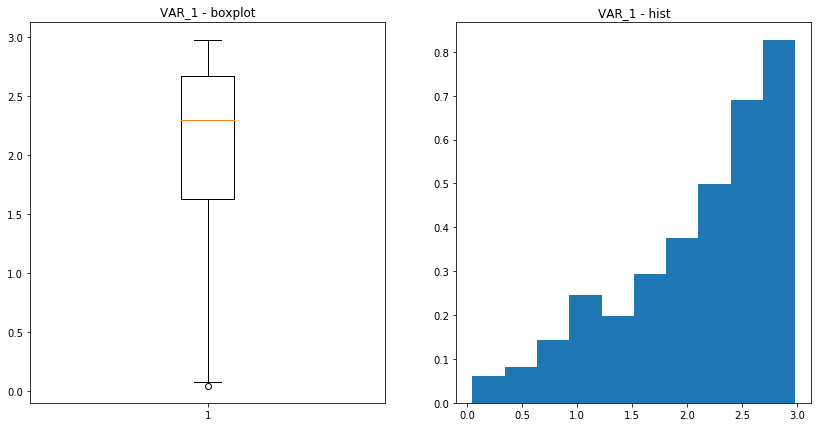

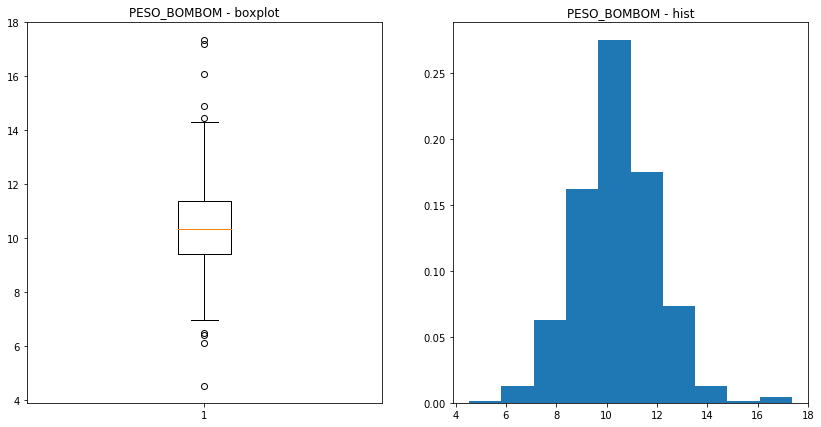

In [5]:
for col in df.loc[:, df.columns != 'VAR_2'].columns:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df[col].values, density=True, bins=10)
    plt.show()

#### Retirando outliers

In [6]:
# primeiro quartil
q1 = df.quantile(0.25)
 
# terceiro quartil
q3 = df.quantile(0.75)
 
# interquartil range
iqr = q3-q1
print(iqr)
# limite inferior e superior
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

df_out = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
df_out.shape

QTD_CHOC       65.870000
VAR_1           1.042500
PESO_BOMBOM     1.954113
dtype: float64


(487, 4)

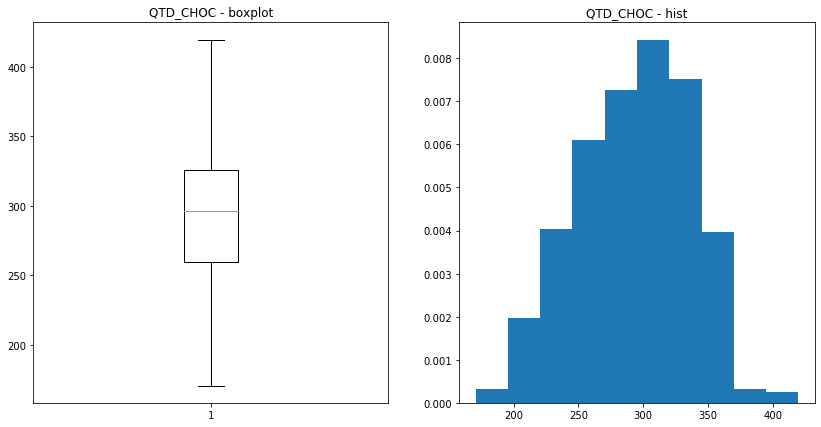

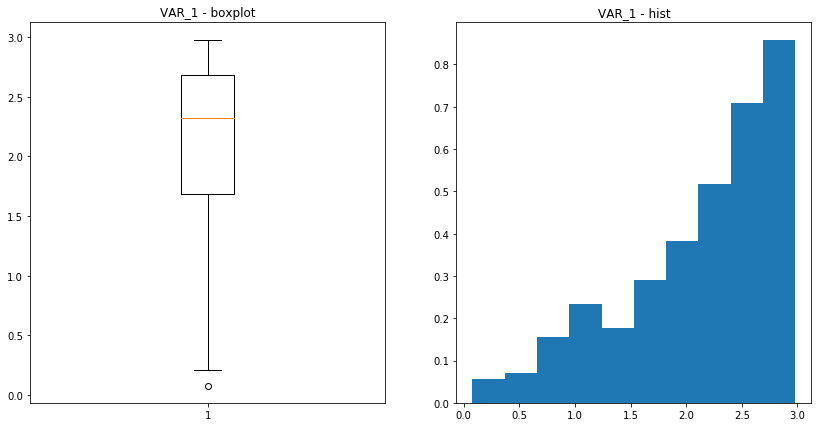

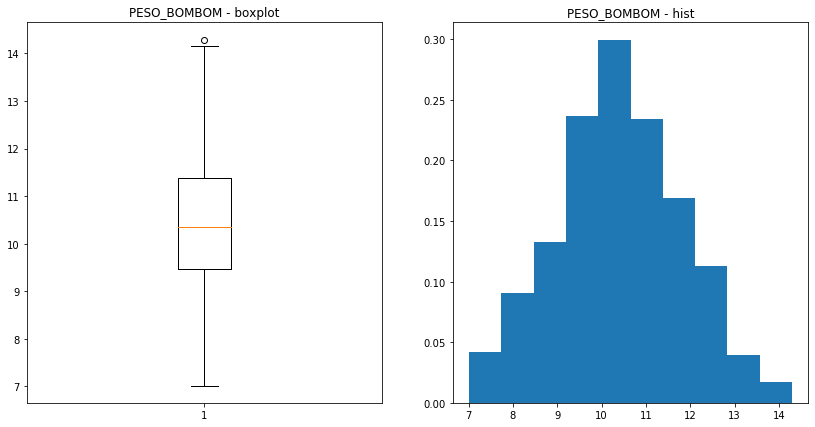

In [7]:
for col in df_out.loc[:, df_out.columns != 'VAR_2'].columns:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df_out[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df_out[col].values, density=True, bins=10)
    plt.show()

### Transformando colunas 

#### VAR_2
- A = 0
- B = 1
- C = 2

In [8]:
# transformando a variavel categórica para numerica
df_out.loc[:,'VAR_2'] = df_out.loc[:,'VAR_2'].astype('category').cat.codes

C:\Users\kemxim\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
df_out.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,0,10.144919
1,320.14,1.55,0,11.547027
2,284.85,2.97,0,11.112109
3,263.92,2.36,2,9.900123
4,276.22,2.98,2,10.079822


### Scatter das variaveis X com Y

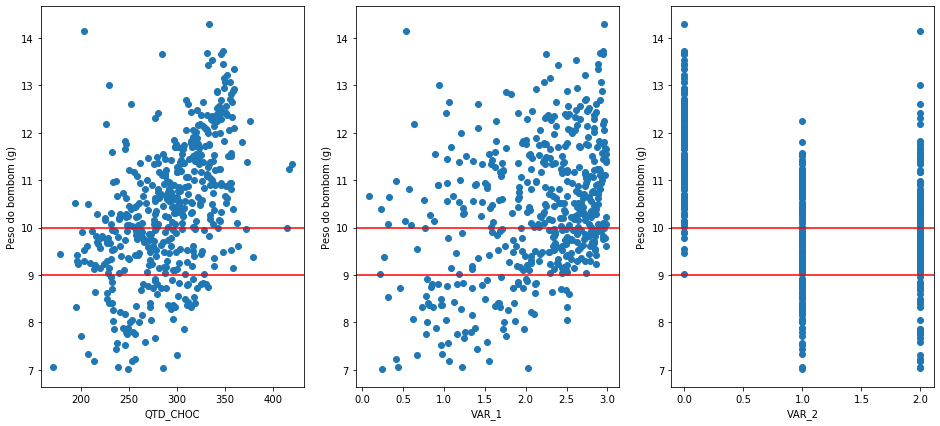

In [22]:
# Quantidade de chocolate por peso de bombom 
fig, ax = plt.subplots(1,3,figsize=(16, 7))

for idx, col in enumerate(df_out.columns[:3]):
    ax[idx].scatter(df_out[col], df_out['PESO_BOMBOM'])
    ax[idx].axhline(y=10, color='r', linestyle='-')
    ax[idx].axhline(y=9, color='r', linestyle='-')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Peso do bombom (g)')

### Criando colunas

#### Criando nova coluna para classificar se o bombom está 0 (padrao ), 1 (descartado) ou 2 (prejuizo)

In [12]:
df_out = df_out.assign(QUALIDADE=pd.Series(df_out.loc[:,"PESO_BOMBOM"].apply(lambda x: 0 if x > 9 and x <= 10 else (1 if x < 9 else 2) )).values)

In [13]:
df_out

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,QUALIDADE
0,320.15,0.88,0,10.144919,2
1,320.14,1.55,0,11.547027,2
2,284.85,2.97,0,11.112109,2
3,263.92,2.36,2,9.900123,0
4,276.22,2.98,2,10.079822,2
...,...,...,...,...,...
494,259.67,2.91,2,9.992756,0
495,301.01,1.59,0,10.471494,2
496,331.41,2.60,0,12.048504,2
498,315.56,1.89,1,9.198321,0


2    168
1    161
0    158
Name: VAR_2, dtype: int64


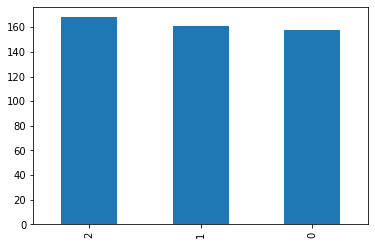

In [14]:
# Variavel var2
df_out['VAR_2'].value_counts().plot(kind='bar')
print(df_out['VAR_2'].value_counts())

2    293
0    118
1     76
Name: QUALIDADE, dtype: int64


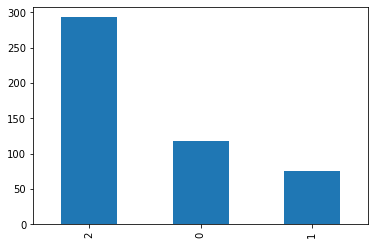

In [15]:
# Variavel qualidade
df_out['QUALIDADE'].value_counts().plot(kind='bar')
print(df_out['QUALIDADE'].value_counts())

### Correlacao

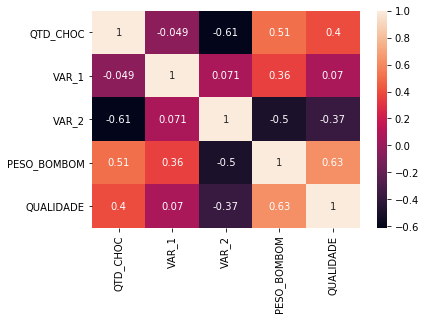

In [16]:
sns.heatmap(df_out.corr(), annot = True)

In [49]:
df_out.groupby(['QUALIDADE']).mean()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
QUALIDADE,,,,
0,270.310254,2.273220,1.449153,9.552423
1,267.655526,1.394605,1.342105,8.213571
2,307.614778,2.252287,0.764505,11.292301


In [46]:
df_out[df_out['QUALIDADE'] == 0].groupby(['VAR_2']).mean()

,QTD_CHOC,VAR_1,PESO_BOMBOM,QUALIDADE
VAR_2,,,,
0,297.325000,0.981667,9.603972,0
1,293.161887,2.149057,9.498093,0
2,247.035254,2.516102,9.595986,0


#### VAR_2
- A = 0
- B = 1
- C = 2

In [45]:
df_out[df_out['QUALIDADE'] == 0].groupby(['VAR_2']).median()

,QTD_CHOC,VAR_1,PESO_BOMBOM,QUALIDADE
VAR_2,,,,
0,296.44,1.10,9.668300,0
1,296.05,2.28,9.484101,0
2,249.83,2.51,9.630381,0


### Resultados

- A fabrica esta produzindo mais bombons com prejuízo
- Uma possível ação para melhorar, seria eliminar a VAR_2 de valor A(0) já que não é possível controlar e ela apresenta uma baixa produção de bombons dentro do padrão, uma grande produção de bombons com prejuízo e a menor quantidade de registros na base registros-prod.xlsx

#### Melhor quantidade de chocolate geral

```
QTD_CHOC	VAR_1
270.310254	2.273220				
  
   
```

#### Melhor quantidade de chocolate e VAR_1 (mesmo não sendo controlavel) por cada tipo de VAR_2 

```
        QTD_CHOC	VAR_1
VAR_2				
    A	297.325000	0.981667
    B	293.161887	2.149057	
    C	247.035254	2.516102	
   
```

In [34]:
df_out.to_excel("../data/preprocessed.xlsx")  